# Imbalanced Dataset

In many real-world machine learning applications, we often encounter imbalanced datasets. This occurs when one class of data is much more frequent than another class. For example, in fraud detection, the number of fraudulent transactions is usually much smaller than the number of legitimate transactions. Another example is in medical diagnosis, where the number of patients with a certain disease may be very small compared to the number of healthy patients.

When dealing with imbalanced datasets, there are several challenges that need to be addressed. In this notebook, we will explore these challenges and some strategies for dealing with them.

## Load the Data

We will use the Diabetes Dataset as an example of an imbalanced dataset. This dataset contains 268 diabetic instances, and the remaining 500 instances of non-diabetic data.

Let's load the dataset and take a look at its class distribution:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Check the null values:**

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Check the dataset's balance:**

In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

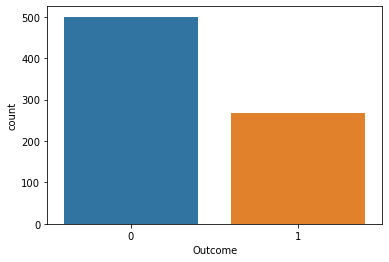

In [5]:
sns.countplot(x='Outcome',data=df)

As we can see, the number of non-diabetic instances is much higher than diabetic instances.

## Challenges of Imbalanced Datasets

When working with imbalanced datasets, there are several challenges that need to be addressed:

- **Bias towards majority class**: Models trained on imbalanced datasets tend to be biased towards the majority class, as they have more instances to learn from. This can result in poor performance on the minority class.
- **Misclassification costs**: Misclassifying instances of the minority class can have a much higher cost than misclassifying instances of the majority class. For example, misclassifying a fraudulent transaction as legitimate can be much more costly than misclassifying a legitimate transaction as fraudulent.
- **Difficulty in evaluating model performance**: Accuracy is not a good metric for evaluating the performance of models trained on imbalanced datasets, as it can be misleading. For example, a model that always predicts the majority class will have high accuracy on an imbalanced dataset, but it will not be useful in practice.



## Strategies for Dealing with Imbalanced Datasets

There are several strategies that can be used to deal with imbalanced datasets:

- **Undersampling**: Undersampling the majority class involves randomly removing instances from the majority class to balance the class distribution. This can be effective for small datasets, but it can result in a loss of information.
- **Oversampling**: Oversampling the minority class involves creating synthetic instances of the minority class to increase its size. This can be done using techniques such as SMOTE (Synthetic Minority Over-sampling Technique).
- **Cost-sensitive learning**: Cost-sensitive learning involves assigning different misclassification costs to different classes. This can be done using techniques such as weighted classification or threshold moving.
- **Ensemble methods**: Ensemble methods involve combining multiple models to improve performance. This can be effective for imbalanced datasets, as it allows models to focus on different aspects of the data.



### Synthetic Minority Oversampling Technique (SMOTE)

However, in this notebook we will only explain the SMOTE algorithm, which is an oversampling technique.

Synthetic Minority Oversampling Technique (SMOTE):
Works by oversampling the minority class (i.e., the class with fewer instances) by generating synthetic examples that are similar to the existing instances. This helps to balance the distribution of classes in the dataset, improving the accuracy and performance of machine learning models.

SMOTE algorithm works as follows:

1. Select a minority instance from the dataset.
2. Find the k nearest neighbors of the selected instance.
3. Choose one of the k neighbors at random and generate a synthetic instance that lies on the line connecting the two instances in the feature space.
4. Repeat steps 1-3 for all minority instances until the desired balance is achieved.

**NOTE:**
We need to use SMOTE only in **X and Y train**.


We need to install imblearn to use SMOTE.
>`!pip install imblearn`

In [6]:
from imblearn.over_sampling import SMOTE

In [34]:
from sklearn.model_selection import train_test_split

x = df.drop('Outcome', axis=1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [35]:
y_train.value_counts()

0    404
1    210
Name: Outcome, dtype: int64

In [36]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x_train, y_train)

In [37]:
y_sm.value_counts()

0    404
1    404
Name: Outcome, dtype: int64

**Check the performance of balanced dataset:**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=23,metric='minkowski')

In [40]:
knn_model.fit(x_sm,y_sm)

KNeighborsClassifier(n_neighbors=23)

In [41]:
y_pred = knn_model.predict(x_test)

In [42]:
print('* Training score (Accuracy): %.3f%%' %(knn_model.score(x_train, y_train)*100))
print('* Testing score (Accuracy): %.3f%%' %(knn_model.score(x_test, y_test)*100))
#print('Accuracy: ', accuracy_score(y_test, y_pred))
print('* Recall: %.3f%%' %(recall_score(y_test, y_pred)*100))
print('* Precision: %.3f%%' %(precision_score(y_test, y_pred)*100))
print('* F1-Score: %.3f%%' %(f1_score(y_test, y_pred)*100))

* Training score (Accuracy): 72.964%
* Testing score (Accuracy): 75.974%
* Recall: 82.759%
* Precision: 64.000%
* F1-Score: 72.180%


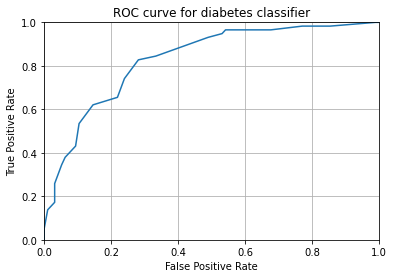

In [43]:
y_pred_prob = knn_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [44]:
print("*AUC Score: %.3f%% " %(roc_auc_score(y_test, y_pred_prob)*100))

*AUC Score: 82.983% 


**Check the performance of imbalanced dataset:**

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=23,metric='minkowski')

In [46]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [47]:
y_pred = knn_model.predict(x_test)

In [48]:
print('* Training score (Accuracy): %.3f%%' %(knn_model.score(x_train, y_train)*100))
print('* Testing score (Accuracy): %.3f%%' %(knn_model.score(x_test, y_test)*100))
#print('Accuracy: ', accuracy_score(y_test, y_pred))
print('* Recall: %.3f%%' %(recall_score(y_test, y_pred)*100))
print('* Precision: %.3f%%' %(precision_score(y_test, y_pred)*100))
print('* F1-Score: %.3f%%' %(f1_score(y_test, y_pred)*100))

* Training score (Accuracy): 77.036%
* Testing score (Accuracy): 75.325%
* Recall: 51.724%
* Precision: 75.000%
* F1-Score: 61.224%


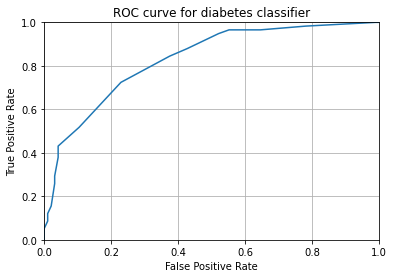

In [49]:
y_pred_prob = knn_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [51]:
print("* AUC Score: %.3f%% " %(roc_auc_score(y_test, y_pred_prob)*100))

* AUC Score: 82.929% 
